### Вступление

Здравствуйте, молодые люди. Это мой первый ipynb документ, который создал именно я.

Так что предлагаю приступить к моим обзорам на задачи.

**Приступим**

### 1. Задача : 
*Coderun* - https://coderun.yandex.ru/problem/coefficients-restoration

**184. Восстановление коэффициентов** 

Если вкратце, то дана функция $f(x)=((a+\varepsilon_{a})\sin{x}+(b+\varepsilon_{b})\ln{x})^2+(c+\varepsilon_{c})x^2$ и нужно подобрать наиболее оптимальные коэффициенты для набора точек.

**Dataset = https://disk.yandex.ru/d/RXnmNGp4PZnMrg**

In [48]:
import pandas as pd

data=pd.read_csv('data.csv',header=None,names=['X','Y'])

data

,X,Y
0,9.481538,394.853787
1,6.878546,238.295702
2,9.436524,393.053669
3,3.572694,55.666155
4,1.079596,13.537515
...,...,...
995,8.714093,366.701156
996,3.783151,60.254649
997,9.104563,380.503300
998,1.717459,32.758233


Решу задачу двумя способами:

**1. Линейная Регрессия**

Чтобы решить задачу линейной регрессией, предлагаю немного преобразовать нашу функцию. Так как **$\varepsilon$** слишком мал, то его можно не учитывать.  
**$$f(x)=((a+\varepsilon_{a})\sin{x}+(b+\varepsilon_{b})\ln{x})^2+(c+\varepsilon_{c})x^2$$**
**$$f(x)=(a\sin{x}+b\ln{x})^2+cx^2$$**
**$$f(x)=a^2\sin^2{x}+2ab\sin{x}\ln{x}+b^2\ln^2{x}+cx^2$$**

Теперь всё выглядит гораздо лучше и с этим уже можно работать. 

Т.е благодаря тому, что мы преобразовали выражение мы теперь можем создать матрицу признаков и вектор коэффициентов.

Запишем их как $X$ и $\vec{k}$ соответственно. Из этого можно вывести уравнение:

**$$X\vec{k}=\vec{y} \rightarrow \vec{k}=X^{+}\vec{y}$$**

*Небольшое примечание*: $X$ не является квадратной матрицей, поэтому тут она псевдообратная $X^{+}$ вместо обратной $X^{-1}$.


Вот визуализация при условии, что $\\ \vec{x}=x_{data}=\begin{bmatrix} x_1\\ x_2\\\vdots \\ x_{1000} \end{bmatrix}$ и $\\ \vec{y}=y_{data}=\begin{bmatrix} y_1\\ y_2\\ \vdots \\ y_{1000} \end{bmatrix}$:
$$\begin{bmatrix} \sin^2{x_1}&\sin{x_1}\ln{x_1}&\ln^2{x_1}&x_1^2\\ \sin^2{x_2}&\sin{x_2}\ln{x_2}&\ln^2{x_2}&x_2^2 \\ \vdots&\vdots&\vdots&\vdots \\ \sin^2{x_{1000}}&\sin{x_{1000}}\ln{x_{1000}}&\ln^2{x_{1000}}&x_{1000}^2 \end{bmatrix} \cdot \begin{bmatrix} a^2\\2ab\\b^2\\c\end{bmatrix}=\begin{bmatrix} y_1\\ y_2\\ \vdots \\ y_{1000} \end{bmatrix}$$


А дальше дело за малым, как говорится

In [49]:
import numpy as np
X=np.array([[np.sin(x)**2,np.sin(x)*np.log(x),np.log(x)**2,x**2] for x in data['X']])
y=np.array(data['Y'])


In [50]:
k=list(np.dot(np.linalg.pinv(X),y))
k

[np.float64(9.86985872438434),
 np.float64(17.079864085982344),
 np.float64(7.389748452309528),
 np.float64(3.9999568607067806)]

Так как все наши коэффициентики уже получены, то осталось последнее действие: свести их к виду $[a,b,c]$ (то есть 2 коэффициент мы отметаем, т.к это $2ab$)

In [51]:
a=round(float(k[0])**0.5,2)
b=round(float(k[2])**0.5,2)
c=round(float(k[3]),2)
print(f'Ответ: a = {a}, b = {b}, c = {c}')

Ответ: a = 3.14, b = 2.72, c = 4.0


На самом деле гораздо легче было взять **LinearRegression** из библиотеки *sklearn* и всё сделать:

In [52]:
from sklearn.linear_model import LinearRegression

Создадим и обучим модель:

In [53]:
model=LinearRegression(fit_intercept=False)
model.fit(X,y)
model.coef_

array([ 9.86985872, 17.07986409,  7.38974845,  3.99995686])

Ну и соответственно процедура повторяется, если нам нужна красивая запись (хотя можно оставлять всегда в numpy массиве), но я это пропущу.

**2. Подгонка функции**

Тут я предложу использовать метод **curve_fit** из библиотеки *scipy*:

In [54]:
from scipy.optimize import curve_fit
X,y=data['X'],data['Y']
def model(x,a,b,c):
    return a**2*np.sin(x)**2+2*a*b*np.sin(x)*np.log(x)+b**2*np.log(x)**2+c*x**2
params=curve_fit(model,X,y,[1,1,1])
params[0]

array([3.14155177, 2.71840382, 3.99996153])

Проверим насколько хорошо подогналась функция:

C:\Users\TEMP.ARKDRONT\AppData\Local\Temp\ipykernel_23916\2978900743.py:4: RuntimeWarning: divide by zero encountered in log
  return a**2*np.sin(x)**2+2*a*b*np.sin(x)*np.log(x)+b**2*np.log(x)**2+c*x**2
C:\Users\TEMP.ARKDRONT\AppData\Local\Temp\ipykernel_23916\2978900743.py:4: RuntimeWarning: invalid value encountered in multiply
  return a**2*np.sin(x)**2+2*a*b*np.sin(x)*np.log(x)+b**2*np.log(x)**2+c*x**2


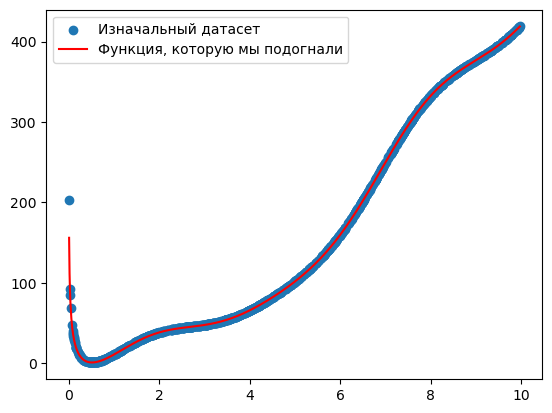

In [55]:
import matplotlib.pyplot as plt
X_p=np.linspace(0,max(X),1000)
y_p=model(X_p,params[0][0],params[0][1],params[0][2])
plt.scatter(X,y)
plt.plot(X_p,y_p,color='red')
plt.legend(['Изначальный датасет','Функция, которую мы подогнали'])
plt.show()

По факту мы просто задали функцию и попросили подогнать коэффициенты под Датасет.